In [21]:
import pandas as pd


#training set values
url = 'https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv'
#url = 'X_train.csv'
X_train = pd.read_csv(url,index_col=0)

#training set labels
url = 'https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv'
#url='y_train.csv'
y_train = pd.read_csv(url,index_col=0)

#test set values
url='https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv'
#url = 'X_test.csv'
X_test = pd.read_csv(url,index_col=0)


print("Loaded")

Loaded


In [2]:
X_train.head()


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
print(X_train.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null obj

In [4]:
print(X_train.describe())


          amount_tsh    gps_height     longitude      latitude   num_private  \
count   59400.000000  59400.000000  59400.000000  5.940000e+04  59400.000000   
mean      317.650385    668.297239     34.077427 -5.706033e+00      0.474141   
std      2997.574558    693.116350      6.567432  2.946019e+00     12.236230   
min         0.000000    -90.000000      0.000000 -1.164944e+01      0.000000   
25%         0.000000      0.000000     33.090347 -8.540621e+00      0.000000   
50%         0.000000    369.000000     34.908743 -5.021597e+00      0.000000   
75%        20.000000   1319.250000     37.178387 -3.326156e+00      0.000000   
max    350000.000000   2770.000000     40.345193 -2.000000e-08   1776.000000   

        region_code  district_code    population  construction_year  
count  59400.000000   59400.000000  59400.000000       59400.000000  
mean      15.297003       5.629747    179.909983        1300.652475  
std       17.587406       9.633649    471.482176         951.620547  

In [5]:
null_counts = X_train.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

scheme_name          28166
scheme_management     3877
installer             3655
funder                3635
public_meeting        3334
permit                3056
subvillage             371
dtype: int64

In [0]:
#X_train.dropna(subset=['permit','public_meeting'])
#X_test.dropna(subset=['permit','public_meeting'])



X_train[['permit','public_meeting']] = X_train[['permit','public_meeting']].fillna(False)
X_test[['permit','public_meeting']] = X_test[['permit','public_meeting']].fillna(False)

In [23]:
import numpy as np

def data_tran (X):
    
    numeric = X.select_dtypes(include=[np.number]).columns.tolist()
    
    categ= [col for col in X.columns if col not in numeric ]

    X['date_recorded'] = pd.to_datetime(X['date_recorded'])
    
    categ.remove('date_recorded')

    X[categ] = X[categ].apply(pd.Series.astype, dtype='category')
    
    return X



X_train = data_tran (X_train)
X_test = data_tran (X_test)

X_train.info()
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   55765 non-null category
gps_height               59400 non-null int64
installer                55745 non-null category
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null category
num_private              59400 non-null int64
basin                    59400 non-null category
subvillage               59029 non-null category
region                   59400 non-null category
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null category
ward                     59400 non-null category
population               59400 non-null int64
public_meeting           59400 non-null category
recorded_by      

In [0]:
""" to drop
a = X_train[categ].apply(pd.Series.nunique)

a



#Droping 

to_drop=['date_recorded','wpt_name','scheme_name','extraction_type_group','extraction_type' ]

to_drop.append('waterpoint_type','source_type','source','quantity_group',)

X_train.drop(to_drop,axis=1,inplace=True)

X_train.head()


"""

In [0]:
numeric = X_train.select_dtypes(include=[np.number]).columns.tolist()

categ= [col for col in X_train.columns if col not in numeric ]

a = X_train[categ].apply(pd.Series.nunique)

a.sort_values()

categoric = ['public_meeting','permit','source_class','management_group','quantity_group','quantity','waterpoint_type_group','quality_group',
            'payment_type','source_type','waterpoint_type','extraction_type_class','payment','water_quality','basin','source']

In [25]:
a = X_train[categ].apply(pd.Series.nunique)

a.sort_values()



recorded_by                  1
public_meeting               2
permit                       2
source_class                 3
management_group             5
quantity_group               5
quantity                     5
waterpoint_type_group        6
quality_group                6
payment_type                 7
source_type                  7
waterpoint_type              7
extraction_type_class        7
payment                      7
water_quality                8
basin                        9
source                      10
scheme_management           12
management                  12
extraction_type_group       13
extraction_type             18
region                      21
lga                        125
date_recorded              356
funder                    1897
ward                      2092
installer                 2145
scheme_name               2696
subvillage               19287
wpt_name                 37400
dtype: int64

In [26]:
import numpy as np

columns = numeric + categoric

columns = ['longitude','latitude','extraction_type_group','quality_group','quantity','waterpoint_type','construction_year']



X_train = X_train[columns]

X_test = X_test[columns]

X.head()
X_test.head()


,longitude,latitude,extraction_type_group,quality_group,quantity,waterpoint_type,construction_year
id,,,,,,,
50785,35.290799,-4.059696,other,good,seasonal,other,2012
51630,36.656709,-3.309214,gravity,good,insufficient,communal standpipe,2000
17168,34.767863,-5.004344,other,good,insufficient,other,2010
45559,38.058046,-9.418672,other,good,dry,other,1987
49871,35.006123,-10.950412,gravity,good,enough,communal standpipe,2000


In [27]:
#Get Dummies



#X = pd.get_dummies(X , columns=categoric)

X_train = pd.get_dummies(X_train )


#X_test = pd.get_dummies(X_test , columns=categoric)

X_test = pd.get_dummies(X_test)


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 34 columns):
longitude                                      59400 non-null float64
latitude                                       59400 non-null float64
construction_year                              59400 non-null int64
extraction_type_group_afridev                  59400 non-null uint8
extraction_type_group_gravity                  59400 non-null uint8
extraction_type_group_india mark ii            59400 non-null uint8
extraction_type_group_india mark iii           59400 non-null uint8
extraction_type_group_mono                     59400 non-null uint8
extraction_type_group_nira/tanira              59400 non-null uint8
extraction_type_group_other                    59400 non-null uint8
extraction_type_group_other handpump           59400 non-null uint8
extraction_type_group_other motorpump          59400 non-null uint8
extraction_type_group_rope pump                59400 non-null uint8

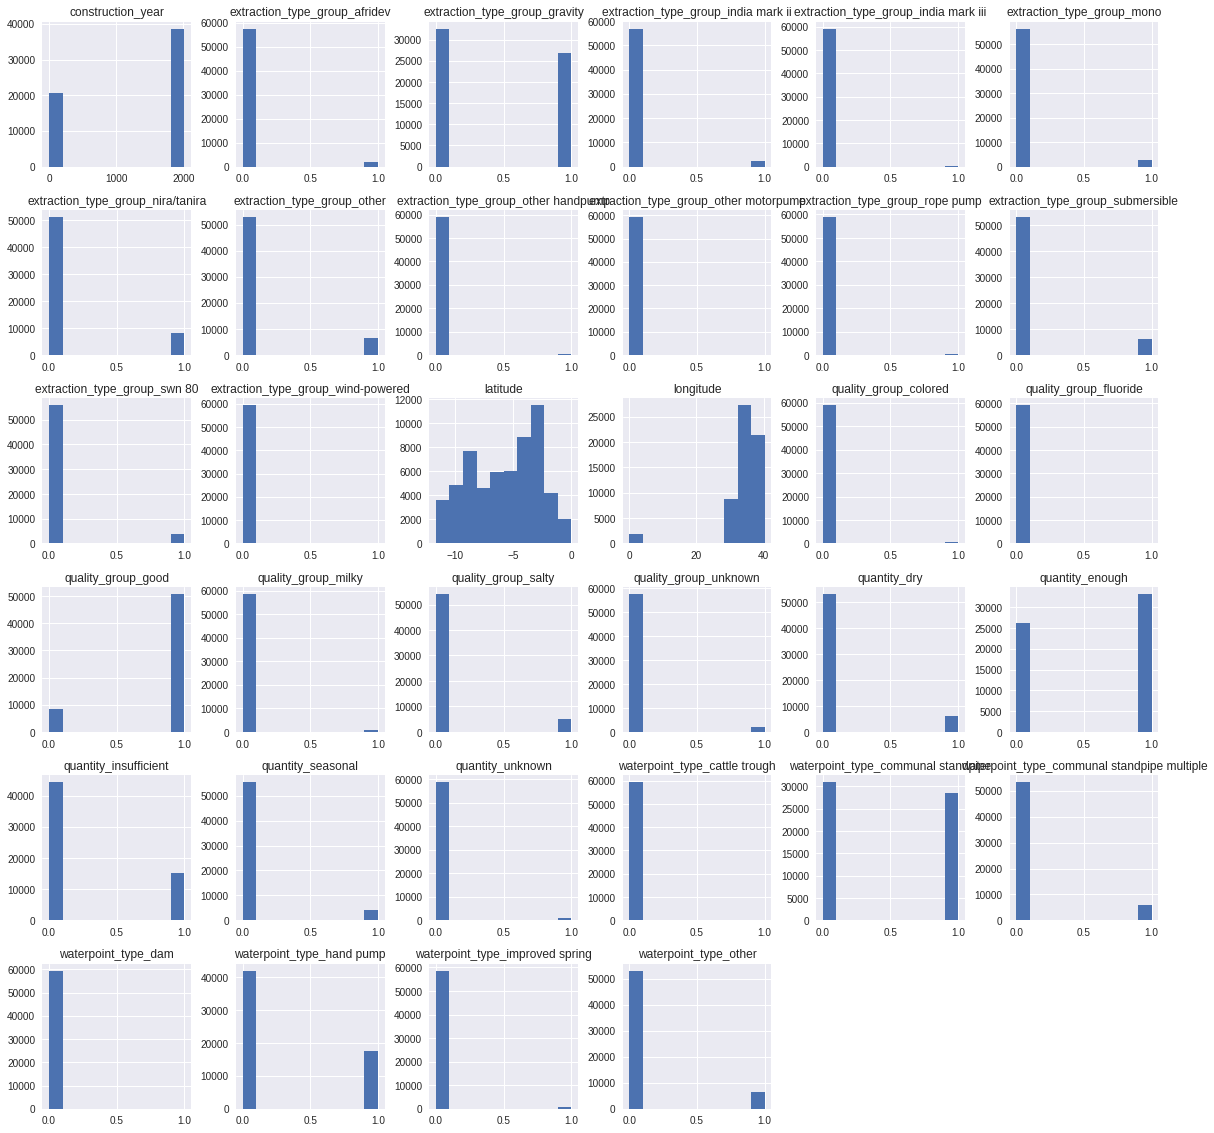

In [28]:
import matplotlib.pyplot as plt

X_train.hist(figsize = (20, 20))
plt.show()

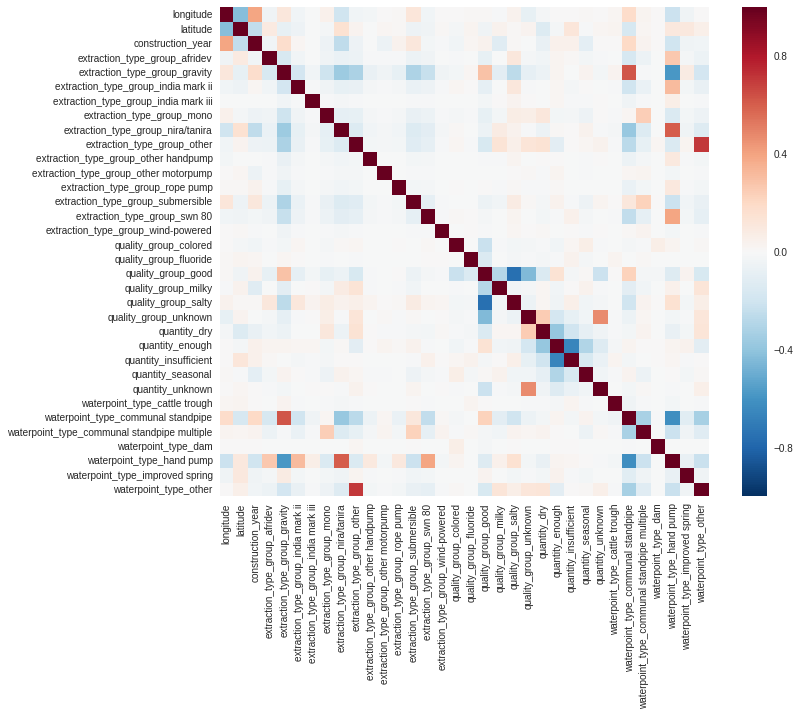

In [29]:
import seaborn as sns
#X_train.drop(['num_private'],inplace=True,axis=1)

corrmat = X_train.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = 1, square = True)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

X, Xtest ,y , ytest = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [0]:
"""
#ADD Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_mtest = scaler.transform(X_test)

standatdscaler=StandardScaler()
X_stand = standatdscaler.fit_transform(X)
X_stest = standatdscaler.transform(X_test)
"""

In [38]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#logreg.fit(X,y)
logreg.fit(X_train,y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X,y)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(Xtest, ytest)))

pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.70


In [0]:
df = pd.DataFrame(pred,columns = ["status_group"],index=X_test.index)
df.to_csv("Logreg.csv")


from google.colab import files
files.download('Logreg.csv')

In [33]:
# Decition Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X,y)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X,y)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}' .format(clf.score(Xtest, ytest)))


pred = clf.predict(X_test)

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.75


In [0]:
#Create submission

df = pd.DataFrame(pred,columns = ["status_group"],index=X_test.index)
df.to_csv("DecitionTree.csv")


from google.colab import files
files.download('DecitionTree.csv')

In [39]:
# K nearest 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X,y)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X,y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(Xtest, ytest)))
pred = knn.predict(X_test)


df = pd.DataFrame(pred,columns = ["status_group"],index=X_test.index)
df.to_csv("Knn.csv")


from google.colab import files
files.download('Knn.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.77
